<a href="https://colab.research.google.com/github/sofienmeftahi/Machine-Learning-appliqu-la-finance/blob/main/ML_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Description du Dataset

Le dataset utilisé dans ce projet contient des informations démographiques, financières et comportementales sur des individus/investisseurs.  
Ces variables permettent d’évaluer leur capacité et leur volonté à prendre des risques.

## 🗂️ Variables du Dataset

### 🔸 **ID**
Identifiant unique attribué à chaque individu dans l’enquête.

### 🔸 **AGE**
Âge de l’individu.

### 🔸 **EDUC**
Niveau d’éducation :
- 1 = primaire  
- 2 = secondaire  
- 3 = bac  
- 4 = universitaire  
- 5 = master  
- 6 = doctorat  

### 🔸 **MARRIED**
Statut marital :
- 0 = non marié  
- 1 = marié  

### 🔸 **KIDS**
Nombre d’enfants à charge.

### 🔸 **LIFECL**  
Stade dans le cycle de vie (young, mid, senior…) codé en valeurs numériques.

### 🔸 **OCCAT**  
Catégorie socio-professionnelle (étudiant, employé, cadre, retraité…).  

### 🔸 **RISK**  
Indice de tolérance au risque :
- Valeurs élevées = investisseur prêt à prendre des risques  
- Valeurs faibles = investisseur prudent  

### 🔸 **HHOUSES**
Nombre de maisons/bien immobiliers possédés par l'individu ou son foyer.

### 🔸 **WSAVED**
Niveau d’épargne mensuelle ou régulière.

### 🔸 **SPENDMOR**
Tendance à dépenser plus que ses revenus :
- Valeur élevée = dépense excessive  
- Valeur faible = dépenses contrôlées  

### 🔸 **NWCAT**
Catégorie de patrimoine net (Net Worth Category).

### 🔸 **INCCL**
Catégorie de revenu mensuel ou annuel.

---

## 🎯 Objectif du Dataset
Ces variables servent à :
- analyser le comportement financier  
- comprendre les profils d’investisseurs  
- mesurer la tolérance au risque  
- créer une segmentation via **K-Means** ou autre modèle de clustering  

---



In [7]:
# -----------------------------
# 1️⃣ Importation des librairies
# -----------------------------
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 2️⃣ Charger les données
# -----------------------------
df = pd.read_excel("ProcessedData.xlsx")
data = df.drop(columns=["ID"])  # Supprimer ID
print("Nombre de lignes et colonnes :", df.shape)

# -----------------------------
# 3️⃣ Normalisation
# -----------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print("Données normalisées avec succès !")


Nombre de lignes et colonnes : (3866, 13)
Données normalisées avec succès !


In [8]:
# 4️⃣ Appliquer GMM
# -----------------------------
gmm = GaussianMixture(n_components=3, random_state=42)
clusters = gmm.fit_predict(scaled_data)

In [9]:
# Ajouter les clusters dans le DataFrame
df["Cluster"] = clusters
print(df['Cluster'].value_counts())


Cluster
2    2016
1     933
0     917
Name: count, dtype: int64


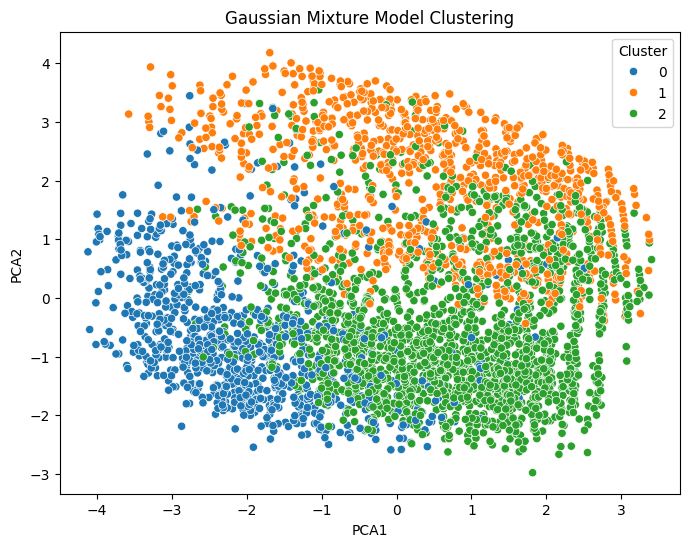

In [10]:
# 5️⃣ Visualisation (PCA 2D)
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)
df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='tab10', data=df)
plt.title("Gaussian Mixture Model Clustering")
plt.show()


In [11]:

#  Calcul du profil moyen par cluster
# -----------------------------
# On prend uniquement les colonnes numériques pour éviter erreurs
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclure éventuellement les colonnes PCA si tu veux pas les inclure
numeric_cols = [col for col in numeric_cols if col not in ['PCA1', 'PCA2']]

# Calcul du profil moyen
cluster_profile = df.groupby("Cluster")[numeric_cols].mean().round(2)

# Afficher le profil
cluster_profile


,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL,Cluster
Cluster,,,,,,,,,,,,,,
0,1934.52,1.95,2.66,1.53,1.11,2.71,1.61,3.26,0.00,2.34,3.43,1.56,2.91,0.0
1,1944.93,4.87,2.73,1.43,0.00,5.64,2.29,3.24,0.81,2.40,3.78,3.30,3.45,1.0
2,1927.74,2.81,3.10,1.24,1.29,3.24,1.55,2.85,1.00,2.51,3.52,3.47,4.12,2.0


In [14]:
# Colonnes à inclure dans le radar
import plotly.graph_objects as go

features = ["EDUC", "MARRIED", "LIFECL", "OCCAT", "RISK", "INCCL", "SPENDMOR"]

fig = go.Figure()

for cluster in cluster_profile.index:
    fig.add_trace(go.Scatterpolar(
        r=cluster_profile.loc[cluster, features],
        theta=features,
        fill='toself',
        name=f"Cluster {cluster}"
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 6])),
    title="Profil comparatif des clusters (radar chart)"
)
fig.show()


# 🧠 Analyse de segmentation des investisseurs

Cette analyse vise à regrouper les individus selon leurs caractéristiques socio-économiques et leurs comportements financiers.  
Les variables prises en compte incluent l’âge, le niveau d’éducation, la situation familiale, le nombre d’enfants, le niveau de vie, la catégorie professionnelle, la tolérance au risque et les revenus.

Après traitement et application d’un algorithme de **clustering**, trois profils principaux ont été identifiés.

---

## 📊 Interprétation des clusters

| Cluster   | Profil général                         | Description analytique |
|-----------|----------------------------------------|-----------------------|
| **Cluster 0** | 🧩 **Jeunes familles prudentes** | 🔹 Âge moyen faible (≈ 2) → jeunes adultes <br> 🔹 Éducation moyenne (≈ 2.3) <br> 🔹 Mariés souvent (1.07 ≈ mariés) <br> 🔹 Enfants présents (≈ 2) <br> 🔹 Faible niveau professionnel (OCCAT ≈ 1.3) <br> 🔹 Forte tolérance au risque (RISK ≈ 3.4) <br> 🔹 Revenus et patrimoine moyens <br> 🟢 **=> Jeunes ménages actifs, modérément prudents mais prêts à prendre des risques pour faire croître leur épargne.** |
| **Cluster 1** | 💼 **Investisseurs expérimentés et aisés** | 🔹 Âge élevé (≈ 4.9) → adultes mûrs <br> 🔹 Niveau d’étude modéré (≈ 2.5) <br> 🔹 Mariés (≈ 1.5) <br> 🔹 Peu ou pas d’enfants <br> 🔹 Très haut niveau de vie (LIFECL ≈ 5.6) <br> 🔹 Bon poste (OCCAT ≈ 2.6) <br> 🔹 RISK ≈ 3.4 → bons preneurs de risque <br> 🟢 **=> Investisseurs mûrs, avec bons revenus, prêts à investir de manière stratégique et plus risquée.** |
| **Cluster 2** | ⚖️ **Classe moyenne stable et prudente** | 🔹 Âge moyen (≈ 3.1) <br> 🔹 Niveau d’étude élevé (≈ 3.6) <br> 🔹 Peu
